# wanna try this fine-tuned model : https://huggingface.co/tiya1012/vit-accident-image

#original model: https://huggingface.co/google/vit-base-patch16-224-in21k

In [ ]:
!pip install accelerate>=0.20.1
!pip install transformers==4.30

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 58.3 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.40.2
    Uninstalling transformers-4.40.2:
      Successfully uninstalled transformers-4.40.2


In [ ]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"vajratiyavajrobol","key":"17e3fc6677891ad99c3d189f2540618f"}'}

In [ ]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [ ]:
!kaggle datasets download -d ckay16/accident-detection-from-cctv-footage

Dataset URL: https://www.kaggle.com/datasets/ckay16/accident-detection-from-cctv-footage
License(s): ODbL-1.0
 97% 241M/249M [00:05<00:00, 74.4MB/s]
100% 249M/249M [00:05<00:00, 46.5MB/s]


In [ ]:
!unzip "/content/accident-detection-from-cctv-footage.zip"

Archive:  /content/accident-detection-from-cctv-footage.zip
  inflating: data/test/Accident/acc1 (7).jpg  
  inflating: data/test/Accident/test10_33.jpg  
  inflating: data/test/Accident/test10_56.jpg  
  inflating: data/test/Accident/test10_61.jpg  
  inflating: data/test/Accident/test12_13.jpg  
  inflating: data/test/Accident/test12_16.jpg  
  inflating: data/test/Accident/test13_22.jpg  
  inflating: data/test/Accident/test15_15.jpg  
  inflating: data/test/Accident/test18_22.jpg  
  inflating: data/test/Accident/test18_24.jpg  
  inflating: data/test/Accident/test19_26.jpg  
  inflating: data/test/Accident/test1_18.jpg  
  inflating: data/test/Accident/test1_20.jpg  
  inflating: data/test/Accident/test1_24.jpg  
  inflating: data/test/Accident/test1_26.jpg  
  inflating: data/test/Accident/test1_27.jpg  
  inflating: data/test/Accident/test21_10.jpg  
  inflating: data/test/Accident/test21_14.jpg  
  inflating: data/test/Accident/test21_18.jpg  
  inflating: data/test/Accident/te

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
!pip install torchvision

In [ ]:
import torch.utils.data as data

train_dir = "/content/data/train"
dev_dir = "/content/data/dev"  # Assuming 'dev' for validation here
test_dir = "/content/data/test"

# Adjust extension as needed (e.g., 'png', 'bmp')
extensions = ("jpg",)


In [ ]:
!pip install datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 14.6 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
import os
from PIL import Image
from datasets import Dataset, DatasetDict


# Define dataset paths (adjust as needed)
data_dir = "/content/data"
train_dir = f"{data_dir}/train"
validation_dir = f"{data_dir}/val"  # Optional
test_dir = f"{data_dir}/test"

# Define image extensions (adjust as needed)
image_extensions = ("jpg", "jpeg", "png", "bmp")

# Define labels for the dataset
labels = ['Non Accident', 'Accident']


def get_label_from_path(path):
  """
  Extracts label (folder name) from the image path.
  """
  folder_name = os.path.basename(os.path.dirname(path))
  return labels.index(folder_name)  # Assuming label name matches folder name


def filter_image_files(paths):
  """
  Filters file paths based on image extensions.
  """
  return [p for p in paths if p.lower().endswith(image_extensions)]


def load_image(image_path):
  """
  Loads an image using PIL. Consider using torchvision for efficiency with large datasets.
  """
  try:
    return Image.open(image_path)
  except (OSError, IOError):
    print(f"Error loading image: {image_path}")
    # Handle loading errors (e.g., skip the image or return a default value)
    return None  # Replace with appropriate error handling


def create_dataset(data_dir, split="train", shuffle_files=True):
  """
  Creates a Dataset object from a directory containing images.

  Args:
      data_dir: Path to the directory containing images.
      split: Dataset split ("train", "validation", or "test").
      shuffle_files: Whether to shuffle the list of files (for training).

  Returns:
      A Dataset object containing image paths, labels (numerical), and image data.
  """

  # Get all image paths
  all_files = []
  for root, dirs, files in os.walk(data_dir):
    all_files.extend([os.path.join(root, file) for file in files])

  # Filter image files
  filtered_paths = filter_image_files(all_files)

  # Load images and create Dataset with features
  dataset = Dataset.from_dict({
      "image_path": filtered_paths,
      "labels": [get_label_from_path(p) for p in filtered_paths],
      "image": [load_image(p) for p in filtered_paths]  # Load image data (consider lazy loading for large datasets)
  })

  # Shuffle files for training split
  if shuffle_files and split == "train":
    dataset = dataset.shuffle(seed=42)
  elif split == "validation":
    # No need to shuffle validation dataset
    pass

  return dataset


# Create datasets (directly combine into DataDict)
dataset = DatasetDict({
  "train": create_dataset(train_dir),
  "validation": create_dataset(validation_dir, split="validation", shuffle_files=False),
  "test": create_dataset(test_dir, split="test", shuffle_files=False)
})

# Print information about the datasets with feature names
print(f"Features of the training set:")
print(dataset["train"].features)

# Print some labels from the training set (assuming numerical labels)
print(f"\nSample labels from the training set:")
print(dataset["train"]["labels"][:5])  # Print the first 5 labels


Features of the training set:
{'image_path': Value(dtype='string', id=None), 'labels': Value(dtype='int64', id=None), 'image': Image(mode=None, decode=True, id=None)}

Sample labels from the training set:
[0, 0, 0, 1, 1]


In [ ]:
print(dataset.shape)

{'train': (791, 3), 'validation': (98, 3), 'test': (100, 3)}


In [ ]:
import random

# Define a function to print a random image and label from a dataset
def print_random_sample(dataset_name):
    dataset_length = len(dataset[dataset_name])
    random_index = random.randint(0, dataset_length - 1)
    sample_image = dataset[dataset_name]["image"][random_index]
    sample_label = dataset[dataset_name]["labels"][random_index]
    print(f"Dataset: {dataset_name}")
    print(f"Label: {labels[sample_label]}")
    sample_image.show()  # Display the image

# Print a random sample from each dataset
print_random_sample("train")
print_random_sample("validation")
print_random_sample("test")


Dataset: train
Label: Accident
Dataset: validation
Label: Non Accident
Dataset: test
Label: Accident


Dataset: train
Label: Non Accident


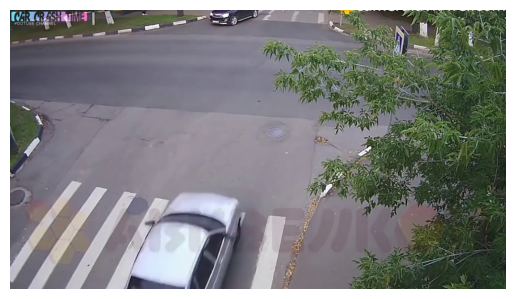

Dataset: validation
Label: Accident


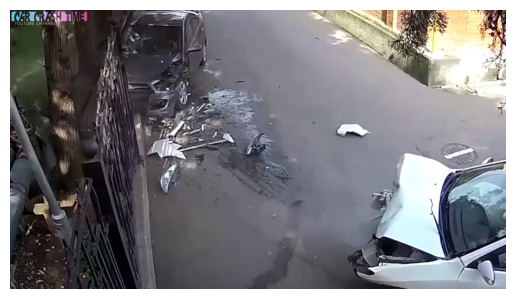

Dataset: test
Label: Accident


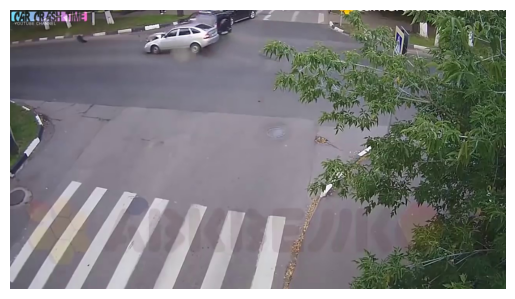

In [ ]:
import random
import matplotlib.pyplot as plt

# Define a function to display a random image and label from a dataset
def display_random_sample(dataset_name):
    dataset_length = len(dataset[dataset_name])
    random_index = random.randint(0, dataset_length - 1)
    sample_image = dataset[dataset_name]["image"][random_index]
    sample_label = dataset[dataset_name]["labels"][random_index]
    print(f"Dataset: {dataset_name}")
    print(f"Label: {labels[sample_label]}")
    plt.imshow(sample_image)
    plt.axis('off')  # Hide axis
    plt.show()

# Display a random sample from each dataset
display_random_sample("train")
display_random_sample("validation")
display_random_sample("test")


In [ ]:
dataset['train'].features['labels']


Value(dtype='int64', id=None)

In [ ]:
# Access the training dataset
train_dataset = dataset["train"]

# Access the validation dataset (if available)
validation_dataset = dataset.get("validation")

# Access the test dataset
test_dataset = dataset["test"]


In [ ]:
ex = dataset['train'][400]
ex

{'image_path': '/content/data/train/Non Accident/test30_4.jpg',
 'labels': 0,
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1280x720>}

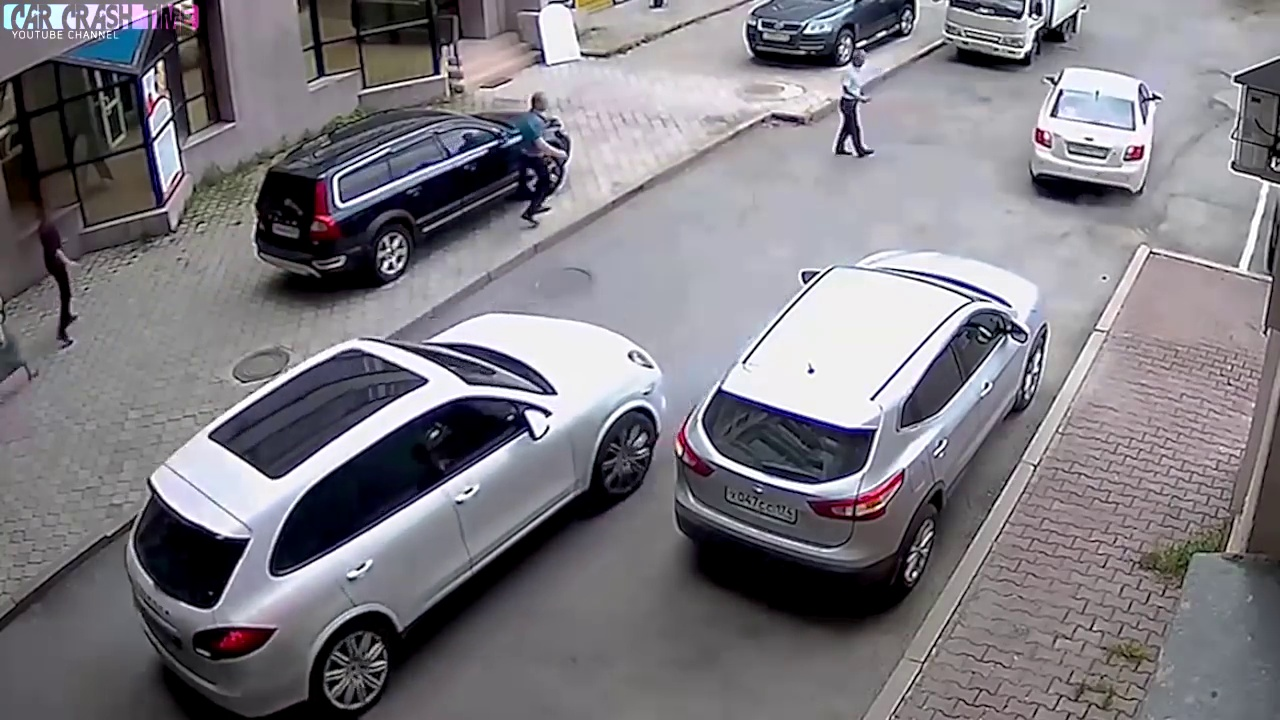

In [ ]:
image = ex['image']
image

In [ ]:
labels = dataset['train'].features['labels']
labels

Value(dtype='int64', id=None)

Summary of Vision Transformer (ViT) model pre-trained on ImageNet-21k:
Architecture: Transformer encoder (similar to BERT)

Pre-training Data: ImageNet-21k (14 million images, 21,843 classes) at 224x224 resolution

Input: Images divided into fixed-size patches (16x16) and converted to a sequence

Key Points:
Pre-trained on a massive image dataset, learning general image features
Includes pre-trained pooler for extracting features for downstream tasks (e.g., image classification)


ImageNet-1K serves as the primary dataset for pretraining deep learning models for computer vision tasks. ImageNet-21K dataset, which contains more pictures and classes




In [ ]:
from transformers import ViTImageProcessor

model_name_or_path = 'google/vit-base-patch16-224-in21k'
processor = ViTImageProcessor.from_pretrained(model_name_or_path)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
processor(image, return_tensors='pt')

{'pixel_values': tensor([[[[-0.2157, -0.2000, -0.2235,  ..., -0.0353, -0.0118,  0.0039],
          [-0.1059,  0.1686,  0.1373,  ...,  0.0039,  0.0353,  0.0588],
          [ 0.0824,  0.4667,  0.1529,  ...,  0.0353,  0.0588,  0.0588],
          ...,
          [-0.3569, -0.3490, -0.3412,  ..., -0.2706, -0.3098, -0.3333],
          [-0.3569, -0.3490, -0.3412,  ..., -0.2706, -0.3098, -0.2941],
          [-0.3569, -0.3490, -0.3412,  ..., -0.2784, -0.3098, -0.2863]],

         [[-0.2471, -0.2392, -0.2157,  ..., -0.0588, -0.0353, -0.0196],
          [-0.0510,  0.4745,  0.4275,  ..., -0.0196,  0.0118,  0.0353],
          [ 0.2235,  0.9608,  0.4275,  ...,  0.0118,  0.0353,  0.0353],
          ...,
          [-0.3647, -0.3647, -0.3569,  ..., -0.2314, -0.2784, -0.3098],
          [-0.3647, -0.3647, -0.3569,  ..., -0.2314, -0.2706, -0.2706],
          [-0.3647, -0.3647, -0.3569,  ..., -0.2392, -0.2784, -0.2627]],

         [[-0.1922, -0.1294, -0.1529,  ..., -0.1137, -0.0902, -0.0745],
          [ 0

In [ ]:
def process_example(example):
    inputs = processor(example['image'], return_tensors='pt')
    inputs['labels'] = example['labels']
    return inputs

In [ ]:
process_example(dataset['train'][0])

{'pixel_values': tensor([[[[-0.3412, -0.2392, -0.2314,  ..., -0.3412, -0.4431, -0.1216],
          [-0.3882, -0.3725, -0.4275,  ..., -0.3569, -0.4431, -0.0980],
          [-0.5922, -0.5608, -0.4902,  ..., -0.3490, -0.4353, -0.1059],
          ...,
          [ 0.2000,  0.2000,  0.1922,  ..., -0.6314, -0.6392, -0.6392],
          [ 0.2000,  0.2000,  0.1922,  ..., -0.6392, -0.6392, -0.6392],
          [ 0.2000,  0.2078,  0.1843,  ..., -0.7176, -0.7176, -0.7176]],

         [[-0.3882, -0.2863, -0.2863,  ..., -0.3176, -0.4431, -0.1294],
          [-0.4275, -0.4196, -0.4667,  ..., -0.3333, -0.4431, -0.1059],
          [-0.6314, -0.6078, -0.5216,  ..., -0.3333, -0.4275, -0.1137],
          ...,
          [ 0.2078,  0.2078,  0.2000,  ..., -0.6157, -0.6235, -0.6157],
          [ 0.2078,  0.2078,  0.2000,  ..., -0.6157, -0.6157, -0.6157],
          [ 0.2078,  0.2157,  0.1922,  ..., -0.7020, -0.7020, -0.7020]],

         [[-0.4980, -0.3961, -0.4118,  ..., -0.3490, -0.4275, -0.0902],
          [-0

In [ ]:
def transform(example_batch):
    # Take a list of PIL images and turn them to pixel values
    inputs = processor([x for x in example_batch['image']], return_tensors='pt')

    # Don't forget to include the labels!
    inputs['labels'] = example_batch['labels']
    return inputs


In [ ]:
prepared_ds = dataset.with_transform(transform)


In [ ]:
prepared_ds['train'][0:2]

{'pixel_values': tensor([[[[-0.3412, -0.2392, -0.2314,  ..., -0.3412, -0.4431, -0.1216],
          [-0.3882, -0.3725, -0.4275,  ..., -0.3569, -0.4431, -0.0980],
          [-0.5922, -0.5608, -0.4902,  ..., -0.3490, -0.4353, -0.1059],
          ...,
          [ 0.2000,  0.2000,  0.1922,  ..., -0.6314, -0.6392, -0.6392],
          [ 0.2000,  0.2000,  0.1922,  ..., -0.6392, -0.6392, -0.6392],
          [ 0.2000,  0.2078,  0.1843,  ..., -0.7176, -0.7176, -0.7176]],

         [[-0.3882, -0.2863, -0.2863,  ..., -0.3176, -0.4431, -0.1294],
          [-0.4275, -0.4196, -0.4667,  ..., -0.3333, -0.4431, -0.1059],
          [-0.6314, -0.6078, -0.5216,  ..., -0.3333, -0.4275, -0.1137],
          ...,
          [ 0.2078,  0.2078,  0.2000,  ..., -0.6157, -0.6235, -0.6157],
          [ 0.2078,  0.2078,  0.2000,  ..., -0.6157, -0.6157, -0.6157],
          [ 0.2078,  0.2157,  0.1922,  ..., -0.7020, -0.7020, -0.7020]],

         [[-0.4980, -0.3961, -0.4118,  ..., -0.3490, -0.4275, -0.0902],
          [-0

In [ ]:
import torch

def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['labels'] for x in batch])
    }


In [ ]:
import numpy as np
from datasets import load_metric

'''metric = load_metric("accuracy")
def compute_metrics(p):
    return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)
'''
import numpy as np
from datasets import load_metric

# Load metrics for accuracy and F1-score
accuracy_metric = load_metric("accuracy")
f1_metric = load_metric("f1")

def compute_metrics(p):
  """
  Computes accuracy and F1-score metrics on predictions and labels.

  Args:
      p: A dictionary containing the model's predictions and labels.
          - predictions: A NumPy array of model predictions (shape: (num_examples, num_classes)).
          - label_ids: A NumPy array of ground truth labels (shape: (num_examples,)).

  Returns:
      A dictionary containing the computed accuracy and F1-score.
  """

  # Get predicted labels (argmax across classes)
  predicted_labels = np.argmax(p.predictions, axis=1)

  # Compute accuracy and F1-score
  accuracy_results = accuracy_metric.compute(predictions=predicted_labels, references=p.label_ids)
  f1_results = f1_metric.compute(predictions=predicted_labels, references=p.label_ids, average="weighted")  # Consider adjusting average parameter

  # Return dictionary with computed metrics
  return {"accuracy": accuracy_results["accuracy"], "f1": f1_results["f1"]}


/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for f1 contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/f1/f1.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next majo

In [ ]:

# Print information about the datasets with feature names
print(f"Features of the training set:")
print(dataset["train"].features)

# No need to access labels.names as they are numerical
num_labels = len(set(dataset["train"]["labels"]))  # Get the number of unique labels

# Load the ViT model with the correct number of labels
from transformers import ViTForImageClassification

model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=num_labels
)

Features of the training set:
{'image_path': Value(dtype='string', id=None), 'labels': Value(dtype='int64', id=None), 'image': Image(mode=None, decode=True, id=None)}


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.bias', 'pooler.dense.weight']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not in

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="./vit-accident-image",
  per_device_train_batch_size=16,
  evaluation_strategy="steps",
  num_train_epochs=10,
  fp16=True,
  save_steps=100,
  eval_steps=100,
  logging_steps=10,
  learning_rate=2e-4,
  save_total_limit=2,
  remove_unused_columns=False,
  push_to_hub=True,
  report_to='tensorboard',
  load_best_model_at_end=True,
)


In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_ds["train"],
    eval_dataset=prepared_ds["validation"],
    tokenizer=processor,
)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'Repository' (from 'huggingface_hub.repository') is deprecated and will be removed from version '1.0'. Please prefer the http-based alternatives instead. Given its large adoption in legacy code, the complete removal is only planned on next major release.
For more details, please read https://huggingface.co/docs/huggingface_hub/concepts/git_vs_http.
  warnings.warn(warning_message, FutureWarning)
/content/./vit-accident-image is already a clone of https://huggingface.co/tiya1012/vit-accident-image. Make sure you pull the latest changes with `repo.git_pull()`.


In [ ]:
from transformers import ViTForImageClassification

model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=num_labels
)

# Training lines (potential problems)
train_results = trainer.train()
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.bias', 'pooler.dense.weight']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not in

Step,Training Loss,Validation Loss,Accuracy,F1
100,0.354600,0.232739,0.918367,0.918435
200,0.165400,0.207496,0.938776,0.938776
300,0.014600,0.249686,0.938776,0.938673
400,0.031700,0.217863,0.928571,0.928519
500,0.019200,0.225481,0.928571,0.928609


Several commits (2) will be pushed upstream.
The progress bars may be unreliable.


Upload file runs/May15_17-51-41_601c3d0c9bcd/events.out.tfevents.1715795517.601c3d0c9bcd.2403.4:   0%|        …

To https://huggingface.co/tiya1012/vit-accident-image
   104335a..12b89f7  main -> main

   104335a..12b89f7  main -> main

To https://huggingface.co/tiya1012/vit-accident-image
   12b89f7..386abf5  main -> main

   12b89f7..386abf5  main -> main



***** train metrics *****
  epoch                    =        10.0
  total_flos               = 570865010GF
  train_loss               =      0.1559
  train_runtime            =  0:08:40.51
  train_samples_per_second =      15.197
  train_steps_per_second   =       0.961


In [ ]:
metrics = trainer.evaluate(prepared_ds['validation'])
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

***** eval metrics *****
  epoch                   =       10.0
  eval_accuracy           =     0.9388
  eval_f1                 =     0.9388
  eval_loss               =     0.2075
  eval_runtime            = 0:00:02.43
  eval_samples_per_second =     40.248
  eval_steps_per_second   =      5.339


In [ ]:
metrics = trainer.evaluate(prepared_ds['test'])
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

***** eval metrics *****
  epoch                   =       10.0
  eval_accuracy           =       0.93
  eval_f1                 =     0.9301
  eval_loss               =     0.2027
  eval_runtime            = 0:00:04.38
  eval_samples_per_second =     22.793
  eval_steps_per_second   =      2.963


In [ ]:
kwargs = {
    "finetuned_from": model.config._name_or_path,
    "tasks": "image-classification",
    "dataset": 'accident classification',
    "tags": ['image-classification'],
}

if training_args.push_to_hub:
    trainer.push_to_hub('🍻 cheers', **kwargs)
else:
    trainer.create_model_card(**kwargs)


To https://huggingface.co/tiya1012/vit-accident-image
   3f5c058..eaee8c9  main -> main

   3f5c058..eaee8c9  main -> main

